# Multivariable Regression: Predicting Wine Taste
----

## Using Cross-Validation to Estimate Out-of-Sample Error with Lasso Modeling

In [1]:
# Importing packages
import urllib3
import numpy
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler


In [24]:
# Importing data

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";",
                  )
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
# keep col names in a list
names = []
for i in data.columns:
    names.append(i)
    
# Separating features and labels 
features, labels = data.iloc[:, :-1], data.iloc[:, [-1]]

# Converting labels to float
labels["quality"] = labels["quality"].astype(float)

# Normalizing features and labels

## create a scaler object
std_scaler = StandardScaler()
std_scaler
## fit and transform the features
features = pd.DataFrame(std_scaler.fit_transform(features))
## fit and transform the labels
labels = pd.DataFrame(std_scaler.fit_transform(labels))

# Convert to np array for input to sklearn packages
Y = numpy.array(labels)
Y = Y.flatten()
X = numpy.array(features)

C:\Users\mehrd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
# Call LassoCV from sklearn.linear_model
wineModel = LassoCV(cv=10).fit(X, Y)

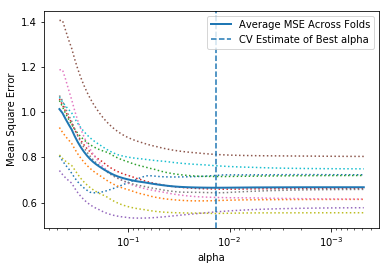

In [30]:
# Display results
plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_, ':')
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1),
 label='Average MSE Across Folds', linewidth=2)
plot.axvline(wineModel.alpha_, linestyle='--',
 label='CV Estimate of Best alpha')
plot.semilogx()
plot.legend()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Mean Square Error')
plot.axis('tight')
plot.show()

In [16]:
#print out the value of alpha that minimizes the Cv-error
print("alpha Value that Minimizes CV Error ",wineModel.alpha_)
print("Minimum MSE ", min(wineModel.mse_path_.mean(axis=-1)))

alpha Value that Minimizes CV Error  0.013561387700964586
Minimum MSE  0.6655849206002812


## Training on the Whole Data Set before Deployment

In [31]:
alphas, coefs, _ = linear_model.lasso_path(X,Y)


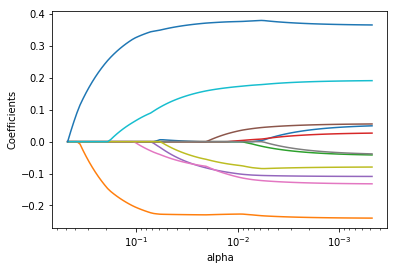

In [43]:
plot.plot(alphas,coefs.T)
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Coefficients')
plot.axis('tight')
plot.show()

In [55]:
nattr, nalpha = coefs.shape

#find coefficient ordering
nzList = []
for iAlpha in range(1,nalpha):
    coefList = list(coefs[: ,iAlpha])
    nzCoef = [index for index in range(nattr) if coefList[index] != 0.0]
    for q in nzCoef:
        if not(q in nzList):
            nzList.append(q)
            
nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attributes Ordered by How Early They Enter the Model", nameList)

Attributes Ordered by How Early They Enter the Model ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'fixed acidity', 'pH', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'density']


In [56]:
#find coefficients corresponding to best alpha value. alpha value
# corresponding to normalized X and normalized Y is 0.013561387700964642
alphaStar = 0.013561387700964642
indexLTalphaStar = [index for index in range(100) if alphas[index] >
alphaStar]
indexStar = max(indexLTalphaStar)

#here's the set of coefficients to deploy
coefStar = list(coefs[:,indexStar])
print("Best Coefficient Values ", coefStar)

#The coefficients on normalized attributes give another slightly
#different ordering
absCoef = [abs(a) for a in coefStar]

#sort by magnitude
coefSorted = sorted(absCoef, reverse=True)
idxCoefSize = [absCoef.index(a) for a in coefSorted if not(a == 0.0)]
namesList2 = [names[idxCoefSize[i]] for i in range(len(idxCoefSize))]
print("Attributes Ordered by Coef Size at Optimum alpha", namesList2)

Best Coefficient Values  [0.0, -0.22796370673467567, -0.0, 0.0, -0.09255280381851322, 0.019018066812194954, -0.0959556606072755, -0.0, -0.06611344060869678, 0.16679697592803328, 0.37461349051250625]
Attributes Ordered by Coef Size at Optimum alpha ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'pH', 'free sulfur dioxide']
